In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['dark_background'])
mpl.rcParams["font.size"] = 14

In [2]:
from deepquantiles import presets, datasets

Using TensorFlow backend.


In [3]:
X, y = datasets.skewed_heteroscedastic(num=10000)

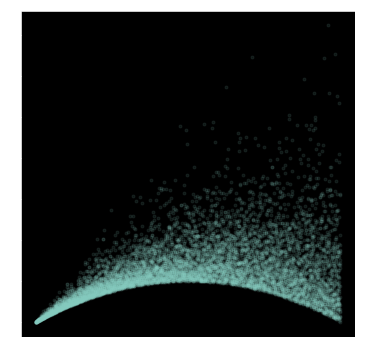

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(X, y, '.', alpha=0.1)

In [5]:
models = [
    presets.mixture_model,
    presets.independent_quantile_model,
    presets.shared_quantile_model,
    presets.inverse_cdf_model,
]

names = [
    'GMDN',
    'indep. quantile networks',
    'shared quantile network',
    'inverse CDF network',
]

fit_kwargs = dict(
    epochs=100,
    batch_size=100,
    shuffle=True,
    verbose=0,
)

In [6]:
for model in models:
    %time model.fit(X, y, callbacks=presets.callbacks, **fit_kwargs)

CPU times: user 26.4 s, sys: 4.25 s, total: 30.7 s
Wall time: 10.2 s
CPU times: user 59.2 s, sys: 8.33 s, total: 1min 7s
Wall time: 21.4 s
CPU times: user 34.5 s, sys: 4.23 s, total: 38.8 s
Wall time: 14.3 s
CPU times: user 43.6 s, sys: 7.52 s, total: 51.1 s
Wall time: 21.1 s


In [7]:
samples1 = []
for model in models:
    %time s = model.sample(X, num_samples=1)
    samples1.append(s)

CPU times: user 341 ms, sys: 0 ns, total: 341 ms
Wall time: 324 ms
CPU times: user 426 ms, sys: 0 ns, total: 426 ms
Wall time: 386 ms
CPU times: user 391 ms, sys: 0 ns, total: 391 ms
Wall time: 365 ms
CPU times: user 3.07 s, sys: 228 ms, total: 3.3 s
Wall time: 910 ms


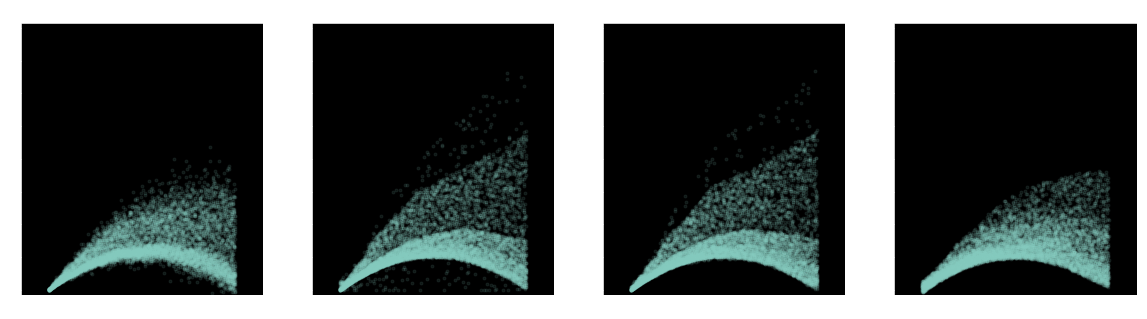

In [37]:
_, axes = plt.subplots(ncols=len(models), figsize=(5 * len(models), 5))
for i, model in enumerate(models):
    ax = axes[i]
    ax.plot(X, samples1[i], '.', alpha=0.1)
    ax.set_xlim([-0.15, 1.15])
    ax.set_ylim([-0.15, 8.15])
    ax.set_title(names[i])
plt.savefig('comparison_skewed_samples.png')

## Summary stats 

In [28]:
num_samples = 5000
samples1000 = []
for model in models:
    %time s = model.sample(X, num_samples=num_samples)
    samples1000.append(s)

CPU times: user 3.15 s, sys: 600 ms, total: 3.75 s
Wall time: 3.74 s
CPU times: user 1.05 s, sys: 161 ms, total: 1.21 s
Wall time: 1.17 s
CPU times: user 1.04 s, sys: 147 ms, total: 1.19 s
Wall time: 1.16 s
CPU times: user 4.9 s, sys: 371 ms, total: 5.27 s
Wall time: 2.9 s


In [31]:
means = [s.mean(axis=1) for s in samples1000]
stds = [s.std(axis=1) for s in samples1000]

theor_mean = 4 * X * (1 - X) + X
theor_sigma = X

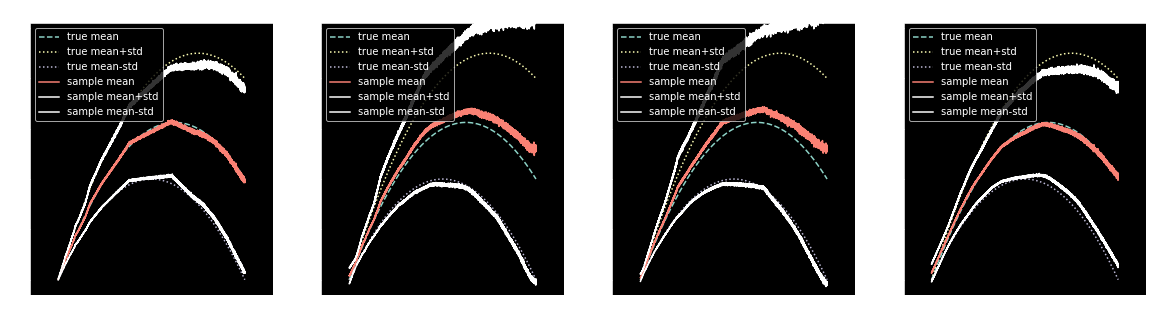

In [38]:
_, axes = plt.subplots(nrows=1, ncols=len(models), sharex=True, sharey=True, figsize=(5 * len(models), 5))
for i, model in enumerate(models):
    ax = axes[i]
    
for i, model in enumerate(models):
    ax = axes[i]
    ax.plot(X, theor_mean, '--', label='true mean')
    ax.plot(X, theor_mean + theor_sigma, ':', label='true mean+std')
    ax.plot(X, theor_mean - theor_sigma, ':', label='true mean-std')
    ax.plot(X, means[i], label='sample mean')
    ax.plot(X, means[i] + stds[i], 'w', label='sample mean+std')
    ax.plot(X, means[i] - stds[i], 'w', label='sample mean-std')
    
    ax.legend()
    ax.set_xlim([-0.15, 1.15])
    ax.set_ylim([-0.15, 2.55])
    ax.set_title(names[i])
plt.savefig('comparison_skewed_samples_mean_std.png')